# **Prepare Dataset**

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import warnings
warnings.filterwarnings('ignore')

In [3]:
od.download('https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: varrasqi
Your Kaggle Key: ··········


100%|██████████| 25.0M/25.0M [00:01<00:00, 19.6MB/s]


# **Data Understanding**

In [4]:
anime_data=pd.read_csv('/content/anime-recommendations-database/anime.csv')
rating_data=pd.read_csv('/content/anime-recommendations-database/rating.csv')

print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [5]:
print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [6]:
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})

anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [7]:
anime_fulldata.shape

(7813727, 9)

In [8]:
anime_fulldata = anime_fulldata.loc[anime_fulldata['user_id'] <= 10000, ['anime_id','anime_title','genre','type','episodes','rating','members','user_id','user_rating']]

In [9]:
anime_fulldata.shape

(1042697, 9)

# **Data Exploratory**

Text(0, 0.5, 'User Rating count')

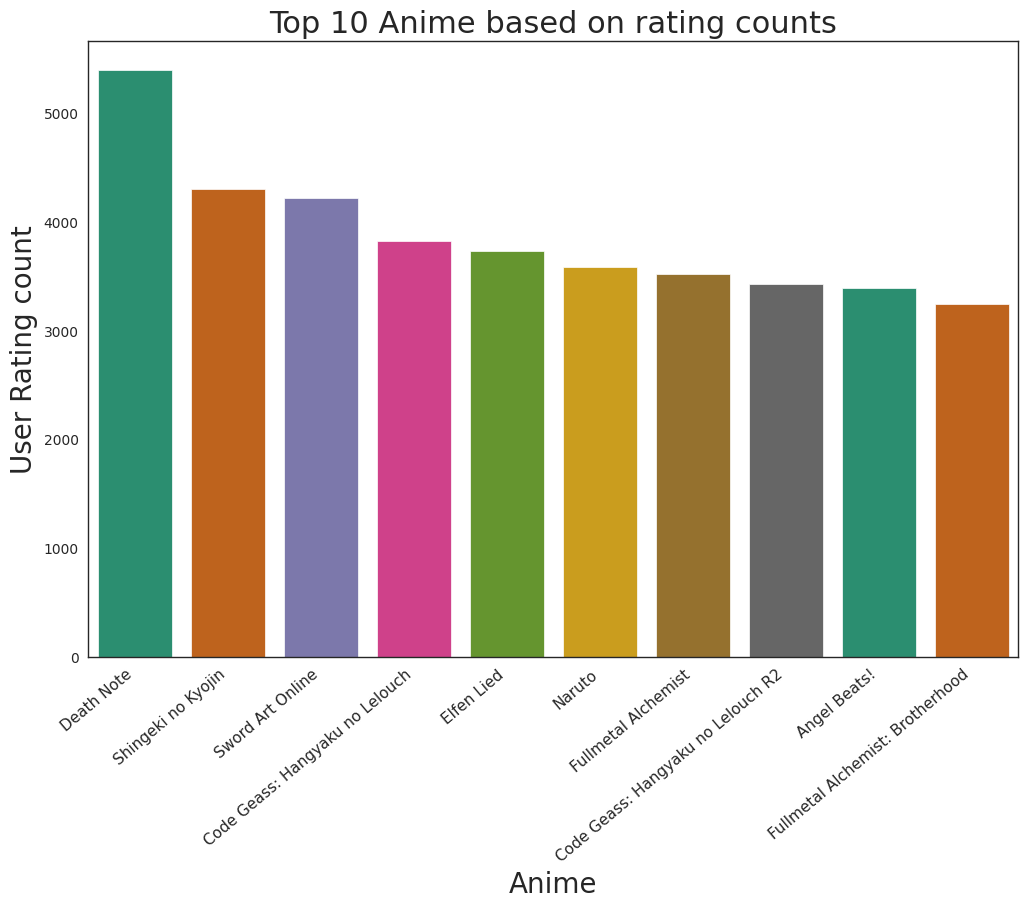

In [10]:
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20)
ax.set_ylabel('User Rating count', fontsize = 20)

In [11]:
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title",
                     keep = 'first', inplace = True)

Text(0, 0.5, 'Community Size')

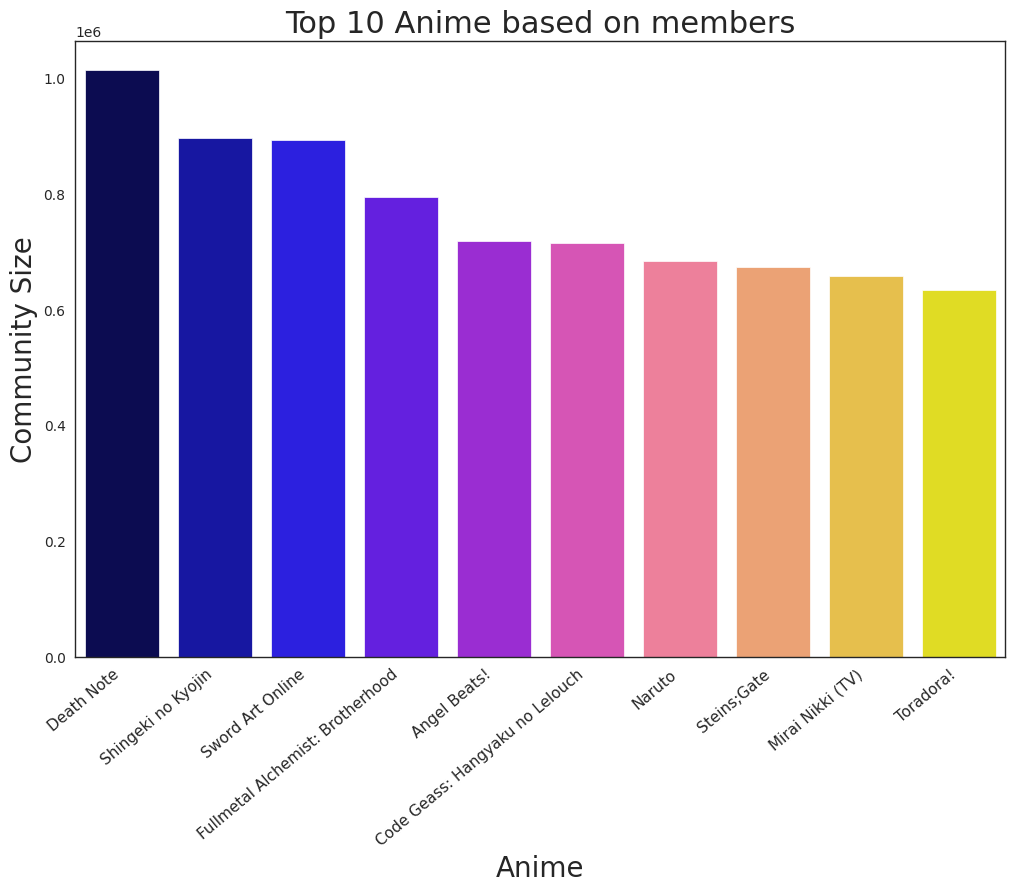

In [12]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20)
ax.set_ylabel('Community Size', fontsize = 20)

Text(0.5, 1.0, 'Rating of users')

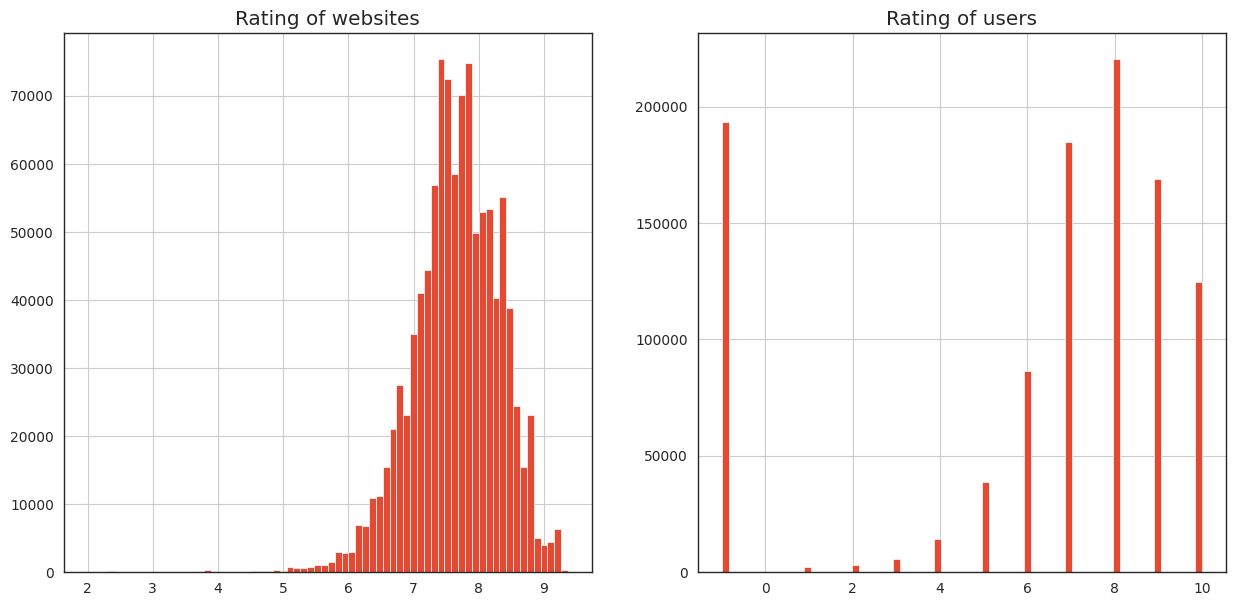

In [13]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

(-0.5, 799.5, 399.5, -0.5)

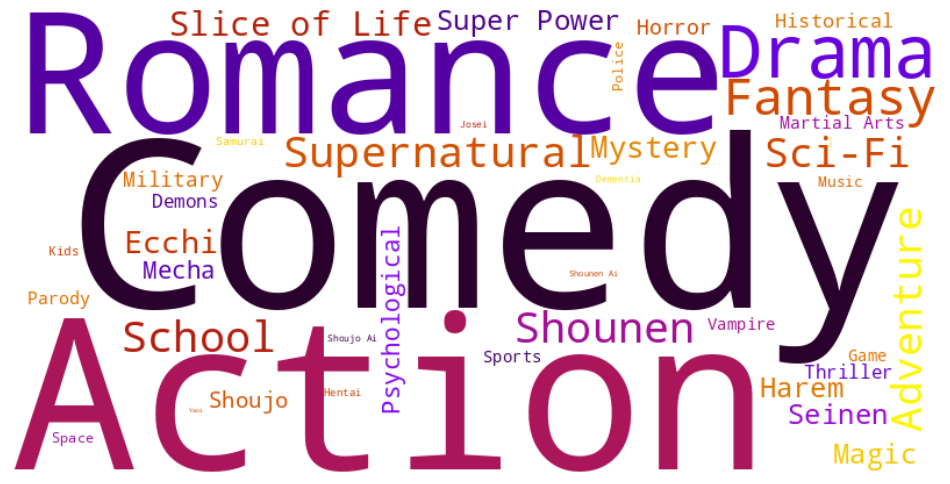

In [14]:
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

# **Data Preparation**

**Handling NaN values**

In [15]:
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [16]:
anime_feature = anime_feature.dropna(axis = 0, how ='any')
anime_feature.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

**Filtering user_id**

In [17]:
anime_feature['user_id'].value_counts()

7345    2429
9032    1702
1530    1584
2951    1412
8217    1403
        ... 
7660       1
8559       1
6560       1
6729       1
2976       1
Name: user_id, Length: 9467, dtype: int64

In [18]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

**Pivot**

In [19]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,210,226,233,235,244,248,250,256,261,271,282,288,294,301,308,317,321,326,341,352,385,392,395,418,428,436,438,439,446,455,460,462,478,492,497,500,511,529,530,531,540,541,547,551,553,565,567,572,573,578,585,593,598,611,634,637,656,659,660,661,662,670,680,687,692,694,702,721,735,741,746,750,762,768,771,774,783,784,786,795,799,806,813,814,819,820,847,861,890,894,916,920,926,936,937,943,946,954,958,963,979,995,996,1013,1019,1020,1031,1044,1058,1084,1103,1114,1116,1119,1132,1140,1145,1163,1169,1176,1190,1191,1195,1202,1210,1213,1216,1222,1223,1235,1237,1244,1274,1280,1284,1287,1306,1309,1324,1327,1332,1344,1349,1354,1366,1378,1396,1400,1404,1410,1418,1419,1425,1435,1441,1442,1450,1456,1482,1497,1501,1504,1522,1530,1541,1549,1551,1558,1570,1576,1578,1585,1589,1600,1605,1619,1620,1623,1647,1651,1689,1695,1697,1701,1705,1711,1720,1734,1737,1753,1771,1786,1788,1797,1798,1807,1811,1822,1835,1842,1843,1844,1847,1853,1854,1888,1890,1913,1918,1929,1937,1938,1947,1954,1957,1963,1984,1987,2016,2021,2025,2050,2102,2113,2115,2118,2125,2141,2165,2194,2200,2204,2212,2246,2268,2273,2290,2297,2298,2300,...,7200,7210,7213,7219,7224,7241,7245,7247,7249,7260,7266,7278,7280,7297,7305,7311,7323,7325,7339,7340,7344,7345,7347,7350,7365,7366,7381,7387,7403,7408,7412,7419,7421,7432,7435,7440,7446,7448,7465,7477,7478,7482,7486,7502,7509,7511,7512,7519,7520,7522,7527,7532,7536,7544,7546,7551,7561,7569,7573,7579,7581,7600,7602,7608,7617,7618,7622,7632,7638,7643,7648,7651,7659,7670,7672,7673,7674,7677,7702,7711,7714,7715,7716,7726,7728,7751,7765,7773,7777,7784,7785,7791,7795,7802,7808,7816,7821,7824,7843,7845,7846,7852,7853,7857,7880,7883,7904,7915,7920,7925,7932,7939,7941,7942,7954,7969,7970,7978,7988,7993,7994,8001,8006,8018,8029,8031,8044,8049,8055,8058,8076,8083,8087,8090,8093,8094,8095,8103,8107,8108,8115,8116,8120,8122,8128,8129,8134,8149,8155,8171,8173,8180,8184,8188,8198,8200,8215,8217,8221,8223,8226,8231,8250,8255,8256,8276,8282,8287,8299,8302,8308,8327,8332,8342,8343,8367,8372,8388,8415,8421,8443,8448,8453,8472,8521,8608,8629,8631,8653,8655,8661,8667,8688,8719,8747,8754,8766,8820,8845,8855,8871,8926,8961,8965,8982,9015,9019,9032,9046,9055,9091,9209,9316,9344,9355,9369,9408,9432,9436,9441,9471,9472,9500,9510,9522,9573,9591,9595,9635,9645,9647,9673,9700,9708,9750,9752,9754,9798,9866,9867,9887,9892,9910,9949,9961,9971,9974,9983,9995,9996
anime_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.

# **Content Based Filtering**

**Cleaning Anime title**

In [20]:
import re
def text_cleaning(text):
    """
    Function to clean text by removing specific patterns.

    Parameters:
    text : str
        The text to be cleaned.

    Returns:
    str
        The cleaned text.
    """
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

**Term Frequency (TF) and Inverse Document Frequency (IDF)**

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [22]:
tfv_matrix.shape

(12294, 1554)

In [23]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [24]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

**Recommendation function**

In [25]:
def give_rec(title, sig=sig):
    """
    Function to provide recommendations based on cosine similarity.

    Parameters:
    title : str
        The title of the anime for which recommendations are sought.
    sig : numpy.ndarray, optional
        The cosine similarity matrix. Default is 'sig'.

    Returns:
    pandas.DataFrame
        DataFrame containing the top 10 most similar anime along with their ratings.
    """
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    sig_scores = sig_scores[1:11]
    anime_indices = [i[0] for i in sig_scores]
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})

In [26]:
give_rec('Dragon Ball Kai')

,Anime name,Rating
0,Dragon Ball Kai (2014),8.01
1,Dragon Ball Kai,7.95
2,Dragon Ball Z Movie 15: Fukkatsu no F,7.55
3,Dragon Ball Super,7.40
4,Dragon Ball Z: Summer Vacation Special,7.05
5,Dragon Ball Z: Atsumare! Gokuu World,6.76
6,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,6.75
7,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,6.28
8,Dragon Ball,8.16
9,Dragon Ball Z Movie 14: Kami to Kami,7.62


In [27]:
give_rec("Death Note")

,Anime name,Rating
0,Death Note Rewrite,7.84
1,Mousou Dairinin,7.74
2,Higurashi no Naku Koro ni Kai,8.41
3,Higurashi no Naku Koro ni Rei,7.56
4,Bloody Night,4.26
5,Higurashi no Naku Koro ni,8.17
6,Shigofumi,7.62
7,Himitsu: The Revelation,7.42
8,Monster,8.72
9,Hikari to Mizu no Daphne,6.87


# **Collaborative Filtering**

**Use column user_id,anime_id, and user_rating**

**only 1000 user**

In [28]:
ratings = anime_fulldata.loc[(anime_fulldata['user_id'] <= 1000) & (anime_fulldata['anime_id'] <= 1500), ['user_id', 'anime_id', 'user_rating']]

In [29]:
ratings.head()

,user_id,anime_id,user_rating
60923,183,820,10
60924,234,820,10
60925,288,820,9
60926,339,820,-1
60927,572,820,10


In [30]:
ratings.shape

(18206, 3)

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

**Data Preparation**

In [32]:
user_ids = ratings['user_id'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [183, 234, 288, 339, 572, 719, 741, 820, 5, 38, 39, 43, 46, 82, 98, 108, 145, 148, 226, 231, 249, 274, 296, 298, 320, 342, 352, 357, 364, 385, 392, 395, 400, 439, 445, 460, 487, 529, 541, 567, 589, 593, 606, 659, 670, 691, 694, 702, 735, 738, 750, 771, 778, 784, 791, 795, 814, 861, 899, 908, 912, 956, 995, 996, 3, 11, 13, 17, 18, 19, 21, 29, 30, 37, 44, 47, 51, 54, 72, 73, 77, 79, 80, 84, 94, 95, 99, 102, 106, 128, 129, 132, 133, 134, 139, 142, 147, 152, 155, 158, 159, 160, 164, 165, 170, 172, 173, 175, 179, 185, 186, 191, 196, 198, 200, 201, 209, 211, 214, 216, 219, 224, 227, 239, 240, 248, 255, 256, 266, 267, 272, 281, 284, 285, 290, 291, 293, 294, 310, 311, 317, 323, 336, 341, 344, 348, 354, 361, 363, 365, 366, 369, 370, 372, 381, 382, 387, 412, 420, 428, 430, 436, 437, 441, 447, 451, 452, 453, 454, 455, 459, 463, 469, 470, 476, 478, 481, 485, 490, 497, 500, 501, 502, 510, 511, 516, 526, 539, 543, 552, 553, 556, 561, 562, 570, 573, 574, 581, 582, 585, 586, 595, 599, 60

In [33]:
anime_ids = ratings['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [34]:
ratings['user'] = ratings['user_id'].map(user_to_user_encoded)
ratings['anime'] = ratings['anime_id'].map(anime_to_anime_encoded)

In [35]:
num_users = len(user_to_user_encoded)
print(num_users)
num_anime = len(anime_encoded_to_anime)
print(num_anime)
ratings['rating'] = ratings['user_rating'].values.astype(np.float32)
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

910
1054
Number of User: 910, Number of Anime: 1054, Min Rating: -1.0, Max Rating: 10.0


In [36]:
df = ratings.sample(frac=1, random_state=42)
df

,user_id,anime_id,user_rating,user,anime,rating
2120589,201,387,9,115,97,9.0
5869473,489,732,7,362,532,7.0
6489729,789,1119,7,250,667,7.0
4822945,793,101,9,456,353,9.0
749326,823,523,9,258,18,9.0
...,...,...,...,...,...,...
4341186,249,356,7,20,296,7.0
4569246,516,181,8,185,325,8.0
1838495,574,223,-1,196,76,-1.0
261552,567,457,9,39,7,9.0


In [37]:
x = df[['user', 'anime']].values
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[115  97]
 [362 532]
 [250 667]
 ...
 [196  76]
 [ 39   7]
 [358 642]] [0.90909091 0.72727273 0.72727273 ... 0.         0.90909091 0.81818182]


**Training**

In [38]:
class RecommenderNet(tf.keras.Model):
  """
    RecommenderNet class for building a recommendation system model.

    Args:
        num_users (int): Number of users in the system.
        num_anime (int): Number of anime items in the system.
        embedding_size (int): Size of the embedding vectors for users and anime.
        **kwargs: Additional keyword arguments.

    Attributes:
        num_users (int): Number of users in the system.
        num_anime (int): Number of anime items in the system.
        embedding_size (int): Size of the embedding vectors for users and anime.
        user_embedding (tf.keras.layers.Embedding): Embedding layer for users.
        user_bias (tf.keras.layers.Embedding): Embedding layer for user biases.
        resto_embedding (tf.keras.layers.Embedding): Embedding layer for anime.
        resto_bias (tf.keras.layers.Embedding): Embedding layer for anime biases.
    """
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    """
        Initialize the RecommenderNet model.

        Args:
            num_users (int): Number of users in the system.
            num_anime (int): Number of anime items in the system.
            embedding_size (int): Size of the embedding vectors for users and anime.
            **kwargs: Additional keyword arguments.
    """
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.resto_embedding = layers.Embedding(
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_anime, 1)

  def call(self, inputs):
    """
        Forward pass of the RecommenderNet model.

        Args:
            inputs (tf.Tensor): Input tensor containing user and anime indices.

        Returns:
            tf.Tensor: Output tensor with sigmoid activation applied.
    """
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1])
    resto_bias = self.resto_bias(inputs[:, 1])

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x)

In [39]:
model = RecommenderNet(num_users, num_anime, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

**Training Model**

In [40]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
1821/1821 [==============================] - 18s 7ms/step - loss: 0.6455 - root_mean_squared_error: 0.3370 - val_loss: 0.6040 - val_root_mean_squared_error: 0.3062
Epoch 2/30
1821/1821 [==============================] - 9s 5ms/step - loss: 0.5798 - root_mean_squared_error: 0.2883 - val_loss: 0.5748 - val_root_mean_squared_error: 0.2825
Epoch 3/30
1821/1821 [==============================] - 8s 5ms/step - loss: 0.5515 - root_mean_squared_error: 0.2646 - val_loss: 0.5528 - val_root_mean_squared_error: 0.2643
Epoch 4/30
1821/1821 [==============================] - 8s 5ms/step - loss: 0.5284 - root_mean_squared_error: 0.2446 - val_loss: 0.5349 - val_root_mean_squared_error: 0.2493
Epoch 5/30
1821/1821 [==============================] - 9s 5ms/step - loss: 0.5123 - root_mean_squared_error: 0.2301 - val_loss: 0.5232 - val_root_mean_squared_error: 0.2396
Epoch 6/30
1821/1821 [==============================] - 8s 5ms/step - loss: 0.4997 - root_mean_squared_error: 0.2188 - val_loss: 

**Metrik**

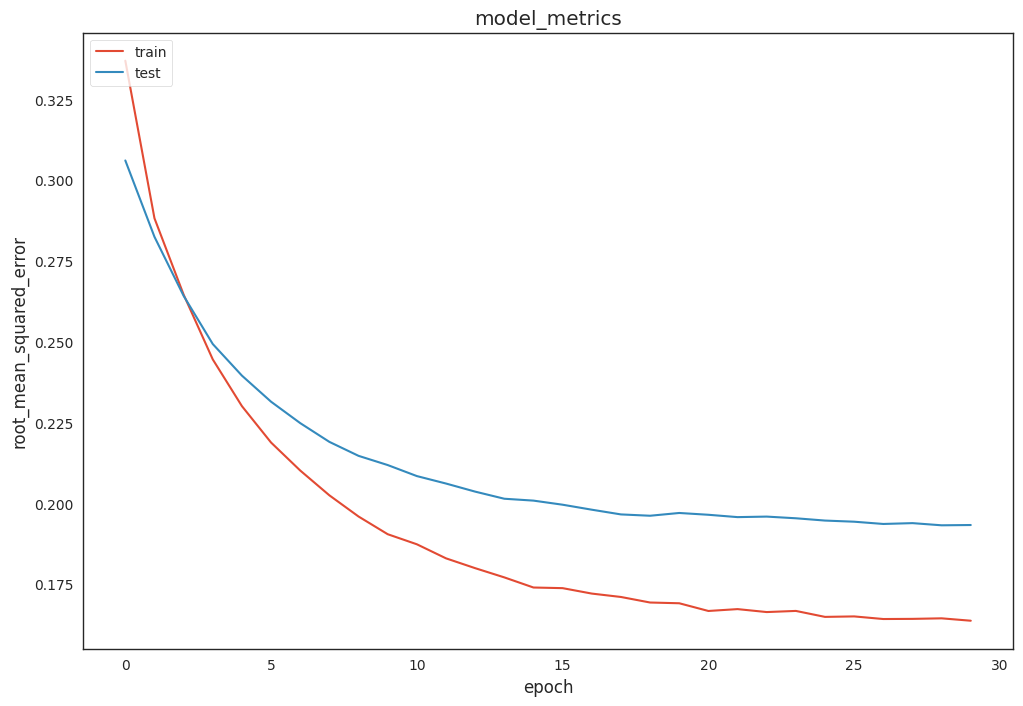

In [41]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

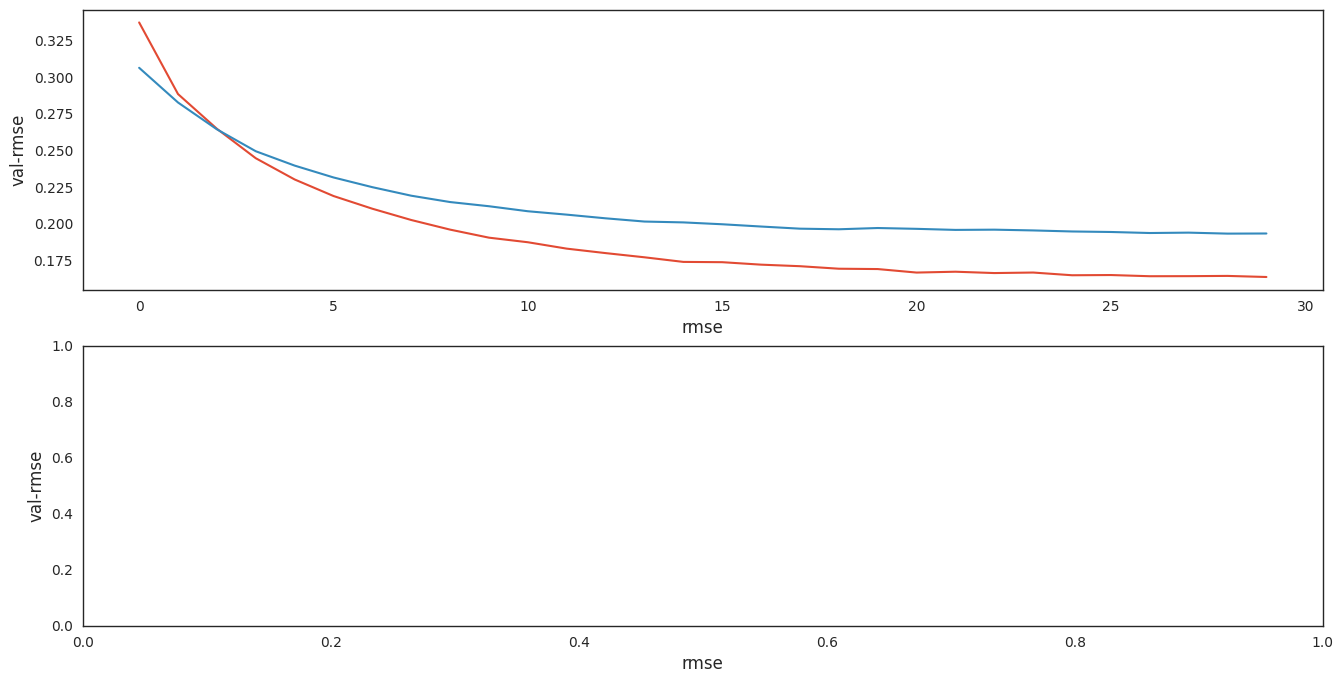

In [42]:
fig, ax = plt.subplots(2, figsize=(16, 8))

mt = history.history['root_mean_squared_error']
mv = history.history['val_root_mean_squared_error']

ax[0].plot(mt)
ax[0].plot(mv)

for plot in ax.flat:
    plot.set(xlabel='rmse', ylabel='val-rmse')

plt.show()

In [43]:
anime_new = anime_fulldata.loc[anime_fulldata['user_id'] <= 1000, ['anime_id', 'anime_title', 'genre']]

In [44]:
anime_df = anime_new
df = ratings

user_id = df.user_id.sample(1).iloc[0]
anime_visited_by_user = df[df.user_id == user_id]

anime_not_visited = anime_df[~anime_df['anime_id'].isin(anime_visited_by_user.anime_id.values)]['anime_id']
anime_not_visited = list(
    set(anime_not_visited)
    .intersection(set(anime_to_anime_encoded.keys()))
)

resto_not_visited = [[anime_to_anime_encoded.get(x)] for x in anime_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

**Get Recommendation**

In [45]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for user: {}'.format(user_id))
print('=' * 9)
print('Anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_visited_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.anime_title, ':', row.genre)

print('Top 10 Anime recommendations')
print('----' * 8)

for anime_id in recommended_anime_ids[:10]:
    recommended_anime_info = anime_df[anime_df['anime_id'] == anime_id].iloc[0]
    print(recommended_anime_info.anime_title, ':', recommended_anime_info.genre)

33/33 [==============================] - 0s 2ms/step
Showing recommendations for user: 357
Anime with high ratings from user
--------------------------------
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi